<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information:

**Age:** Age of the employee

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**

**Import the required libraries**

In [25]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# resample the dataset
#from sklearn.utils import resample
#from sklearn.utils import shuffle

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
from IPython.display import Image

# importing the random library
import random

# setting the random seed
# DO NOT CHANGE
np.random.seed(1)

In [26]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [28]:
# load the csv file
df_employee = pd.read_csv('emp_attrition.csv')

# display the first two observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [29]:
# check data types of variables
df_employee.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [30]:
# check the size of data
df_employee.shape

(1580, 18)

#### Split the dependent and independent variables.

In [32]:
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature'
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [143]:
# if the value in the target variable is 'Yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0

# change the datatype of the target variable to integer
df_target = df_target.astype('int')

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


#### Filter numerical and categorical variables.

In [35]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [36]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [object])

# display categorical features
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [38]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [40]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,10,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
1,32,4,4,1,3,4,10400,1,11,3,14,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
2,40,9,4,3,1,1,2018,3,14,3,5,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,42,7,2,4,2,2,2372,6,16,3,1,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,43,27,3,3,3,1,10820,8,11,3,8,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**Check the outliers in all the variables and treat them using IQR technique.**

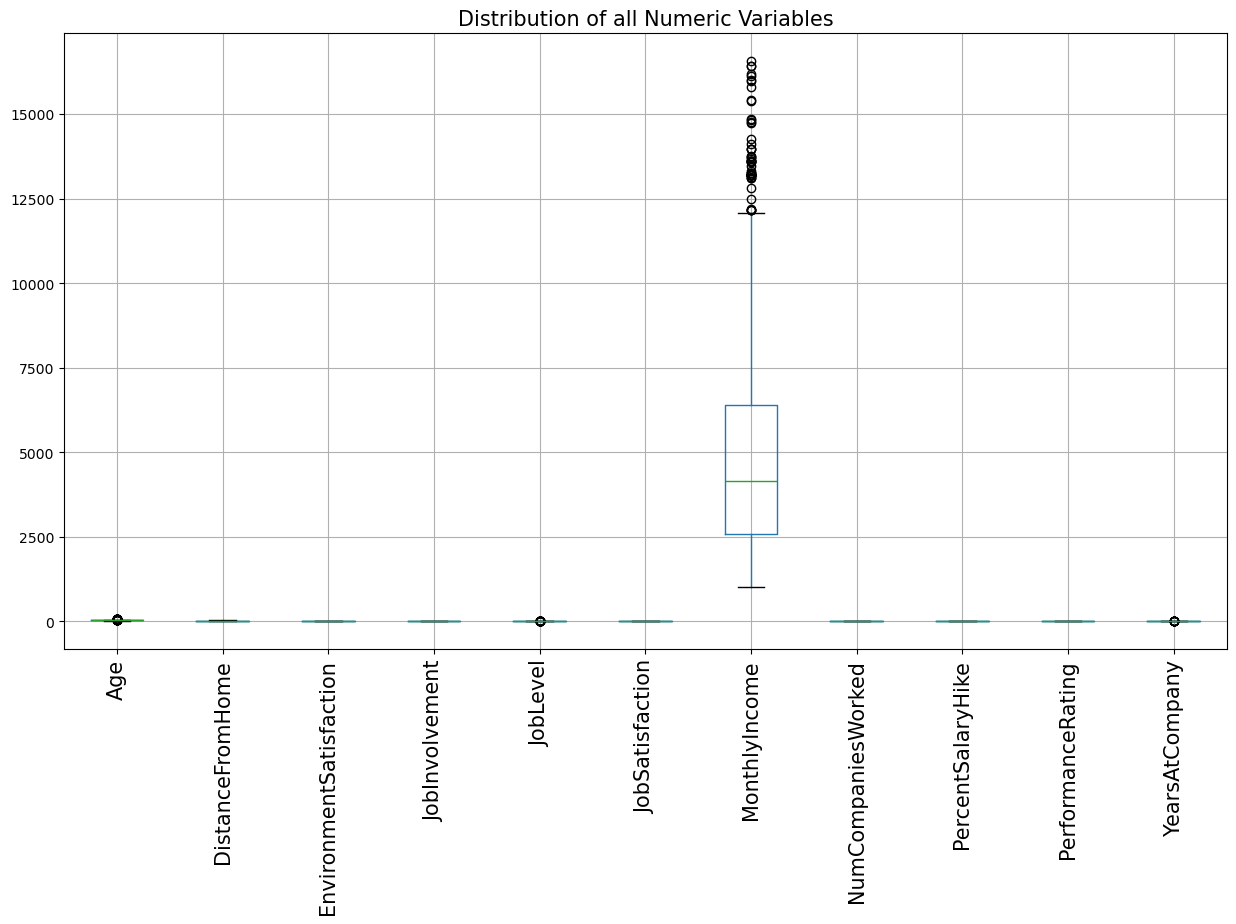

In [42]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_num.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'MonthlyIncome' has a quite large range as compared to the other variables. Thus, it is difficult to see the outliers in other variables. So, we plot the boxplots of independent variables again by not considering the variable 'MonthlyIncome'**

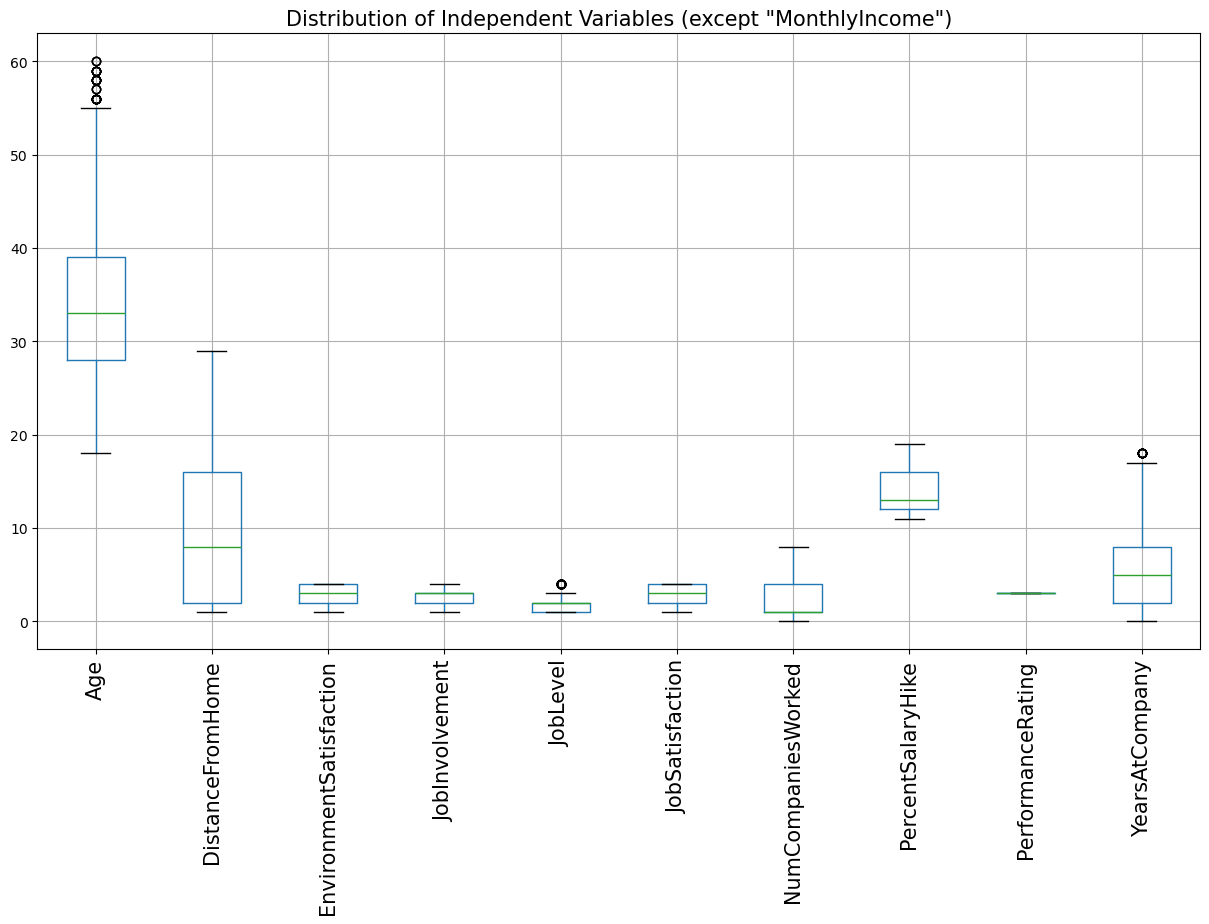

In [44]:
# plot boxplots of all the numeric variables except 'MonthlyIncome'
df_num[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "MonthlyIncome")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that some of the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [46]:
# check the shape of the data
print(df_target.shape)
print(X.shape)

(1580,)
(1580, 30)


In [127]:
# calculate the first quartile
Q1 = df_num.quantile(0.25)

#calculate the third quartile
Q3 = df_num.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_target = df_target[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
X = X[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df_target = df_target.reset_index(drop=True)
X = X.reset_index(drop=True)

# check the shape of the data
print(df_target.shape)
print(X.shape)


(1403,)
(1403, 30)


In [141]:

print(df_target)


0       1
1       1
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      0
22      1
23      0
24      1
25      0
26      0
27      0
28      1
29      1
30      1
31      1
32      0
33      1
34      1
35      0
36      1
37      1
38      0
39      0
40      1
41      0
42      1
43      0
44      0
45      1
46      1
47      0
48      1
49      0
50      0
51      1
52      0
53      0
54      0
55      0
56      1
57      1
58      0
59      0
60      1
61      0
62      0
63      0
64      0
65      0
66      1
67      0
68      1
69      1
70      0
71      1
72      0
73      1
74      0
75      0
76      1
77      0
78      1
79      1
80      0
81      1
82      0
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      0
91      1
92      0
93      1
94      0
95      1
96      1
97      0
98      1
99      0


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score






# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy * 100:.2f}%')


Accuracy of the Decision Tree model: 89.87%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('emp_attrition.csv')

# Encode categorical columns
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes/No to 1/0
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['OverTime'] = le.fit_transform(df['OverTime'])

# Split data into features (X) and target (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Calculate feature importance
importances = clf.feature_importances_

# Get the top 3 most important features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 3 important features:\n", top_features)



Model accuracy: 0.8987
Top 3 important features:
                     Feature  Importance
11            MonthlyIncome    0.178605
0                       Age    0.127065
16           YearsAtCompany    0.081981
10          JobSatisfaction    0.078230
3          DistanceFromHome    0.070416
13                 OverTime    0.064970
14        PercentSalaryHike    0.061213
12       NumCompaniesWorked    0.057146
4            EducationField    0.056233
9                   JobRole    0.048931
7            JobInvolvement    0.048269
1            BusinessTravel    0.035864
6                    Gender    0.031700
5   EnvironmentSatisfaction    0.025844
8                  JobLevel    0.024140
2                Department    0.009394
15        PerformanceRating    0.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3.  Find the area under the receiver operating characteristic curve for full model built in question 2. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [205]:
from sklearn.metrics import roc_auc_score

# Assuming you have your predicted probabilities stored in y_pred_proba
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9057189542483661


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Plot a confusion matrix for the full model built in Q2.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[231  39]
 [  9 195]]


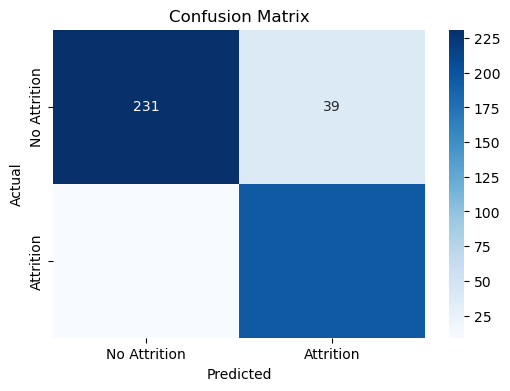

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your predicted labels stored in y_pred
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create a heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations for the model built in Q2. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [222]:
# type your code here
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your predicted labels stored in y_pred
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate specificity, sensitivity, % of misclassified and correctly classified observations
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
misclassified_percent = (fp + fn) / (tp + tn + fp + fn) * 100
correctly_classified_percent = (tp + tn) / (tp + tn + fp + fn) * 100

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("% of Misclassified Observations:", misclassified_percent)
print("% of Correctly Classified Observations:", correctly_classified_percent)

Specificity: 0.8555555555555555
Sensitivity: 0.9558823529411765
% of Misclassified Observations: 10.126582278481013
% of Correctly Classified Observations: 89.87341772151899


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

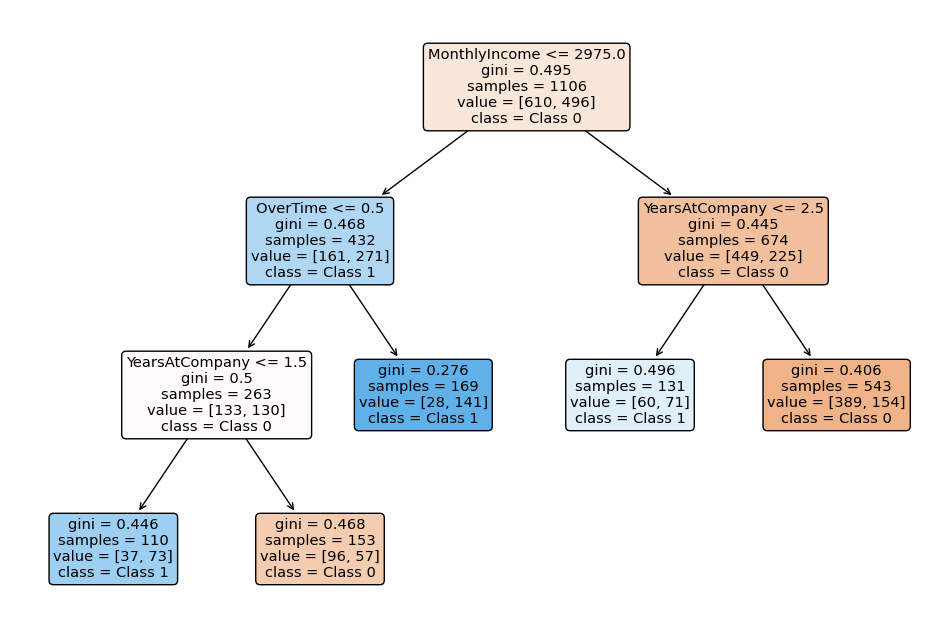

In [224]:
# type your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt





# Create a decision tree classifier with a maximum of 5 terminal nodes
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])  # Replace 'Class 0' and 'Class 1' with your actual class labels
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the data into train and test set for upcoming questions

In [ ]:
# split data into train subset and test subset
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size = 0.3)

In [226]:
# type your code here
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier



# Create a decision tree classifier with your predefined parameters
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust parameters as needed

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Calculate average accuracy
average_accuracy = scores.mean()

print("Average accuracy:", average_accuracy)

Average accuracy: 0.7006329113924051


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [229]:
# type your code here
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best score: 0.8869552810729282


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Build a decision tree model using the tuned hyperparameters from Q8, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [231]:
# type your code here

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Create a decision tree classifier with the best hyperparameters
clf = DecisionTreeClassifier(**best_params)

# Perform 10-fold cross-validation with ROC-AUC as the scoring metric
scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

# Calculate average ROC-AUC score
average_roc_auc = scores.mean()

print("Average ROC-AUC score:", average_roc_auc)


Average ROC-AUC score: 0.9172564935064935
